In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = InteractiveSession(config=config)

## 데이터 수집

In [3]:
x = np.round(np.linspace(0, 100, 1001),1)
x

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [4]:
y = np.sin(x)
y

array([ 0.        ,  0.09983342,  0.19866933, ..., -0.66758835,
       -0.58992416, -0.50636564])

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(index=x, data=y, columns=['sine wave'])

<AxesSubplot:>

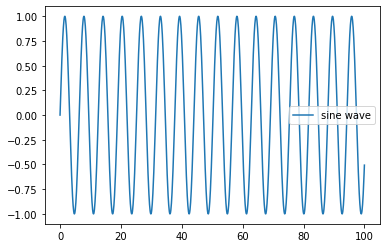

In [7]:
df.plot()

## 데이터 가공

In [8]:
train = df.iloc[:801]
test = df.iloc[801:]

## 정규화

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [11]:
s_train = scaler.transform(train)

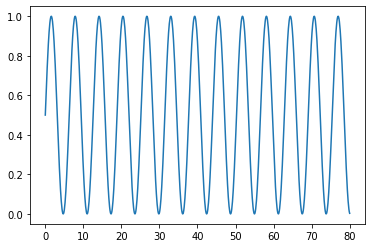

In [12]:
plt.plot(x[:801], s_train)

In [13]:
scaler.fit(test)
s_test = scaler.transform(test)

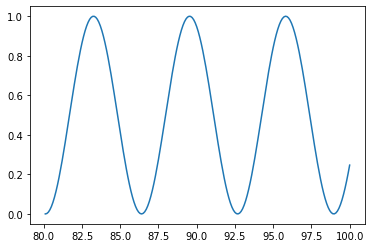

In [14]:
plt.plot(x[801:], s_test)

## TimeseriesGenerator

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
g_train = TimeseriesGenerator(s_train, s_train, 50, batch_size=1)

In [17]:
g_train[0]

(array([[[4.99998429e-01],
         [5.49915469e-01],
         [5.99333755e-01],
         [6.47759515e-01],
         [6.94708895e-01],
         [7.39712793e-01],
         [7.82321544e-01],
         [8.22109415e-01],
         [8.58678860e-01],
         [8.91664489e-01],
         [9.20736720e-01],
         [9.45605073e-01],
         [9.66021072e-01],
         [9.81780726e-01],
         [9.92726571e-01],
         [9.98749240e-01],
         [9.99788555e-01],
         [9.95834132e-01],
         [9.86925483e-01],
         [9.73151620e-01],
         [9.54650167e-01],
         [9.31605983e-01],
         [9.04249320e-01],
         [8.72853515e-01],
         [8.37732266e-01],
         [7.99236491e-01],
         [7.57750829e-01],
         [7.13689791e-01],
         [6.67493618e-01],
         [6.19623889e-01],
         [5.70558902e-01],
         [5.20788899e-01],
         [4.70811163e-01],
         [4.21125057e-01],
         [3.72227028e-01],
         [3.24605649e-01],
         [2.78736736e-01],
 

In [18]:
model_RNN = tf.keras.Sequential()

In [19]:
model_RNN.add(tf.keras.layers.LSTM(500, input_shape=(50, 1)))
model_RNN.add(tf.keras.layers.Dense(1))

In [20]:
model_RNN.compile(optimizer='adam', loss='mse')

In [21]:
g_test = TimeseriesGenerator(s_test, s_test, 50, batch_size=1)

In [22]:
model_RNN.fit(g_train, epochs=4)

Epoch 1/4
751/751 [==============================] - 3s 4ms/step - loss: 0.0036
Epoch 2/4
751/751 [==============================] - 3s 5ms/step - loss: 6.5952e-05
Epoch 3/4
751/751 [==============================] - 3s 5ms/step - loss: 0.0274
Epoch 4/4
751/751 [==============================] - 3s 5ms/step - loss: 4.4841e-05


In [23]:
model_RNN_history = pd.DataFrame(model_RNN.history.history)

In [24]:
model_RNN_history

,loss
0,0.003646
1,0.000066
2,0.027401
3,0.000045


In [25]:
predict_test = model_RNN.predict(g_test)

In [26]:
len(predict_test)

150

In [27]:
test1 = test.drop(test.index[:50])

In [28]:
test1

,sine wave
85.1,-0.273470
85.2,-0.368131
85.3,-0.459115
85.4,-0.545511
85.5,-0.626456
...,...
99.6,-0.802196
99.7,-0.738582
99.8,-0.667588
99.9,-0.589924


## 정규화했던 값들을 다시 풀어줌

In [29]:
true_predict = scaler.inverse_transform(predict_test)
true_predict

array([[-0.27930495],
       [-0.37691298],
       [-0.47018632],
       [-0.55784905],
       [-0.63877505],
       [-0.71204996],
       [-0.77701056],
       [-0.83324856],
       [-0.8805757 ],
       [-0.9189617 ],
       [-0.9484598 ],
       [-0.96914345],
       [-0.981062  ],
       [-0.9842252 ],
       [-0.9786091 ],
       [-0.9641784 ],
       [-0.9409141 ],
       [-0.90884227],
       [-0.86805785],
       [-0.8187426 ],
       [-0.7611774 ],
       [-0.6957493 ],
       [-0.62295437],
       [-0.54339874],
       [-0.4577959 ],
       [-0.36696276],
       [-0.27181318],
       [-0.17334914],
       [-0.07264859],
       [ 0.02914959],
       [ 0.1308659 ],
       [ 0.23130119],
       [ 0.32926455],
       [ 0.42359808],
       [ 0.5132052 ],
       [ 0.59707505],
       [ 0.6743043 ],
       [ 0.74411184],
       [ 0.8058487 ],
       [ 0.8590001 ],
       [ 0.90318125],
       [ 0.9381283 ],
       [ 0.9636843 ],
       [ 0.9797839 ],
       [ 0.9864386 ],
       [ 0

In [30]:
test1['sine predict'] = true_predict

In [31]:
test1

,sine wave,sine predict
85.1,-0.273470,-0.279305
85.2,-0.368131,-0.376913
85.3,-0.459115,-0.470186
85.4,-0.545511,-0.557849
85.5,-0.626456,-0.638775
...,...,...
99.6,-0.802196,-0.800288
99.7,-0.738582,-0.740029
99.8,-0.667588,-0.672063
99.9,-0.589924,-0.596921


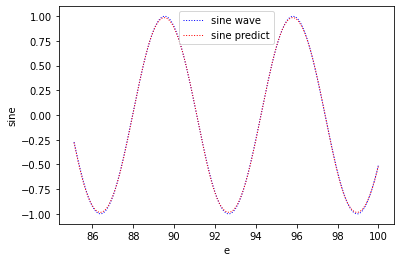

In [32]:
plt.plot(test1.index, test1.iloc[:,0], linewidth=1.0, linestyle=":", color='blue', label=test1.columns[0])
plt.plot(test1.index, test1.iloc[:,1], linewidth=1.0, linestyle=':', color='red', label=test1.columns[1])
plt.legend()
plt.xlabel('e')
plt.ylabel('sine')
plt.show()

# 미래 데이터 예측

In [33]:
allscaler = MinMaxScaler()
s_all_scaler = allscaler.fit_transform(df)
s_all_scaler

array([[0.49999843],
       [0.54991547],
       [0.59933376],
       ...,
       [0.16620203],
       [0.20503439],
       [0.24681392]])

In [34]:
generator_all = TimeseriesGenerator(s_all_scaler, s_all_scaler, 50, batch_size=1)

In [35]:
model_LSTM = tf.keras.Sequential()

In [36]:
model_LSTM.add(tf.keras.layers.LSTM(500, input_shape=(50, 1)))
model_LSTM.add(tf.keras.layers.Dense(1))

In [37]:
model_LSTM.compile(loss='mse', optimizer='adam')

In [38]:
model_LSTM.fit(generator_all, epochs=4)

Epoch 1/4
951/951 [==============================] - 4s 5ms/step - loss: 0.0095
Epoch 2/4
951/951 [==============================] - 4s 5ms/step - loss: 1.9362e-04
Epoch 3/4
951/951 [==============================] - 4s 4ms/step - loss: 3.5203e-04
Epoch 4/4
951/951 [==============================] - 4s 4ms/step - loss: 2.9608e-05


In [39]:
forecast = []
batch = s_all_scaler[-50:]
current_batch = batch.reshape(1, 50, 1)

for i in range(300):
    current_predict = model_LSTM.predict(current_batch)
    forecast.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:], [current_predict], axis=1)

In [40]:
'''
for i in range(300):
    current_predict = model_LSTM.predict(current_batch)[0]
    forecast.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:], [[current_predict]], axis=1)
로 하면 np.array, reshape 생략 가능
'''

'\nfor i in range(300):\n    current_predict = model_LSTM.predict(current_batch)[0]\n    forecast.append(current_predict)\n    current_batch = np.append(current_batch[:,1:,:], [[current_predict]], axis=1)\n로 하면 np.array, reshape 생략 가능\n'

In [41]:
forecast_index = np.arange(100.1, 130.0, 0.1)

In [42]:
print(len(forecast))
print(len(forecast_index))

300
300


In [43]:
np.array(forecast)[:5]

array([[[0.28973123]],

       [[0.3355368 ]],

       [[0.38281158]],

       [[0.43106538]],

       [[0.47978947]]], dtype=float32)

In [44]:
np.array(forecast).reshape(300,1)[:5]

array([[0.28973123],
       [0.3355368 ],
       [0.38281158],
       [0.43106538],
       [0.47978947]], dtype=float32)

In [45]:
forecast1 = np.array(forecast).reshape(300,1)

In [46]:
forecast_datas = allscaler.inverse_transform(forecast1)

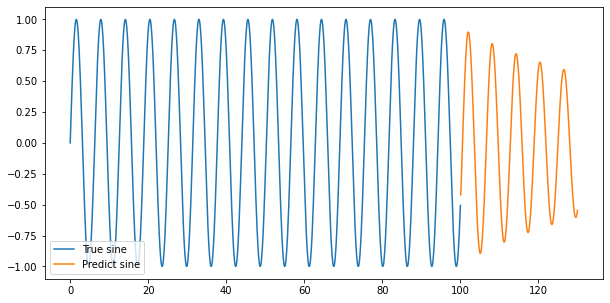

In [47]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sine wave'], label='True sine')
plt.plot(forecast_index, forecast_datas, label='Predict sine')
plt.legend(loc='lower left')
plt.show()

# time_cose (실습)

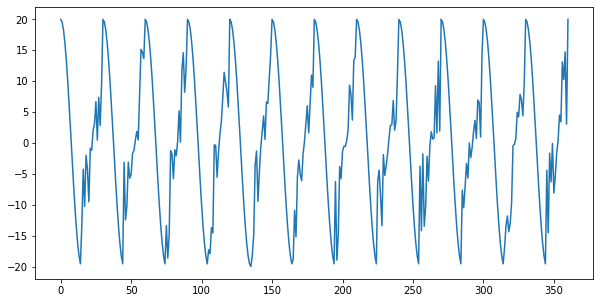

In [48]:
np.random.seed(2020)


x_data=np.arange(30*12+1)
month_time=(x_data%30)/30
y_data=20*np.where(month_time < 0.5,
                     np.cos(2*np.pi * month_time),
                     np.cos(2*np.pi * month_time)*np.random.random(361))

plt.figure(figsize=(10,5))
plt.plot(np.arange(30*12+1),y_data[:30 * 12+1])

In [49]:
x_data

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [50]:
y_data

array([ 2.00000000e+01,  1.95629520e+01,  1.82709092e+01,  1.61803399e+01,
        1.33826121e+01,  1.00000000e+01,  6.18033989e+00,  2.09056927e+00,
       -2.09056927e+00, -6.18033989e+00, -1.00000000e+01, -1.33826121e+01,
       -1.61803399e+01, -1.82709092e+01, -1.95629520e+01, -1.33360610e+01,
       -4.24712938e+00, -1.02577814e+01, -2.00925483e+00, -4.27890935e+00,
       -9.53213873e+00, -8.48911653e-01, -1.19039752e+00,  2.03969627e+00,
        3.11097952e+00,  6.67664206e+00,  4.57571556e-01,  7.38016638e+00,
        2.84754609e+00,  9.31292309e+00,  2.00000000e+01,  1.95629520e+01,
        1.82709092e+01,  1.61803399e+01,  1.33826121e+01,  1.00000000e+01,
        6.18033989e+00,  2.09056927e+00, -2.09056927e+00, -6.18033989e+00,
       -1.00000000e+01, -1.33826121e+01, -1.61803399e+01, -1.82709092e+01,
       -1.95629520e+01, -3.12330833e+00, -1.24595313e+01, -1.01530654e+01,
       -3.10547182e+00, -5.69638892e+00, -5.13420208e+00, -1.66484504e+00,
       -1.25229284e+00,  

In [51]:
y_scaler = MinMaxScaler()
s_y = y_scaler.fit_transform(y_data.reshape(361,1))

In [52]:
s_y

array([[1.        ],
       [0.98907024],
       [0.95675866],
       [0.90447741],
       [0.83451145],
       [0.74991861],
       [0.65439602],
       [0.55211847],
       [0.44755598],
       [0.34527843],
       [0.24975584],
       [0.165163  ],
       [0.09519704],
       [0.04291579],
       [0.0106042 ],
       [0.16632716],
       [0.39362442],
       [0.2433092 ],
       [0.4495895 ],
       [0.39282966],
       [0.26145617],
       [0.47860752],
       [0.4700676 ],
       [0.55084623],
       [0.57763703],
       [0.66680762],
       [0.51128024],
       [0.68440145],
       [0.57104905],
       [0.7327361 ],
       [1.        ],
       [0.98907024],
       [0.95675866],
       [0.90447741],
       [0.83451145],
       [0.74991861],
       [0.65439602],
       [0.55211847],
       [0.44755598],
       [0.34527843],
       [0.24975584],
       [0.165163  ],
       [0.09519704],
       [0.04291579],
       [0.0106042 ],
       [0.4217291 ],
       [0.18824754],
       [0.245

In [53]:
g_y = TimeseriesGenerator(s_y, s_y, 50, 1)

In [54]:
time_model = tf.keras.Sequential()

In [55]:
time_model.add(tf.keras.layers.LSTM(150, input_shape=(50,1)))
time_model.add(tf.keras.layers.Dense(1))

In [56]:
time_model.compile(loss='mse', optimizer='adam')

In [57]:
time_model.fit(g_y, epochs=300)

Epoch 1/300
3/3 [==============================] - 0s 4ms/step - loss: 0.2376
Epoch 2/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1046
Epoch 3/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1064
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0814
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0807
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0759
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0653
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0584
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0556
Epoch 10/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0525
Epoch 11/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 12/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 13/300
3/3 [==============================] - 0s 4ms/st

3/3 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 105/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 106/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 107/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 108/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 109/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 110/300
3/3 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 111/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 112/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 113/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 114/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 115/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 116/300
3/3 [==============================] - 0

3/3 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 207/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 208/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 209/300
3/3 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 210/300
3/3 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 211/300
3/3 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 212/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 213/300
3/3 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 214/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 215/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 216/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 217/300
3/3 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 218/300
3/3 [==============================] - 0

In [58]:
forecast = []
batch = s_y[-50:]
current_batch = batch.reshape(1, 50, 1)

In [59]:
for _ in range(200):
    current_predict = time_model.predict(current_batch)[0]
    forecast.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:], [[current_predict]], axis=1)

In [60]:
len(forecast)

200

In [61]:
forecast_index = np.arange(361, 561, 1)
len(forecast_index)

200

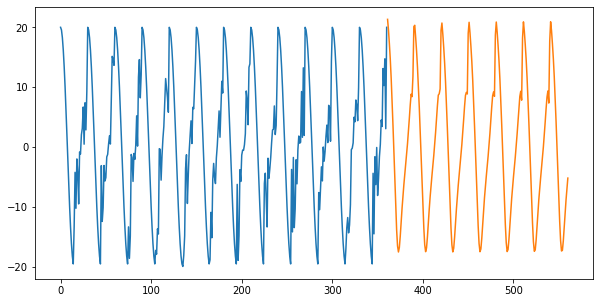

In [62]:
predict = y_scaler.inverse_transform(forecast)
plt.figure(figsize=(10,5))
plt.plot(np.arange(30*12+1),y_data[:30 * 12+1])
plt.plot(forecast_index, predict)